# Autoencoder with MNIST

## Imports

In [27]:
from keras.datasets import mnist
import matplotlib.pyplot as plt 
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms

## Load data

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data() # Loads training and test set of MNIST

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(f"Training: {train_X.shape}, testing: {test_X.shape}")

Training: (60000, 28, 28), testing: (10000, 28, 28)


## Inspect the data

In [17]:
number_idx = [np.where(test_y == numb)[0][0] for numb in range(10)] # Get first index of every unique number
test_img = [test_X[idx] for idx in number_idx] # Get image data of every unique number

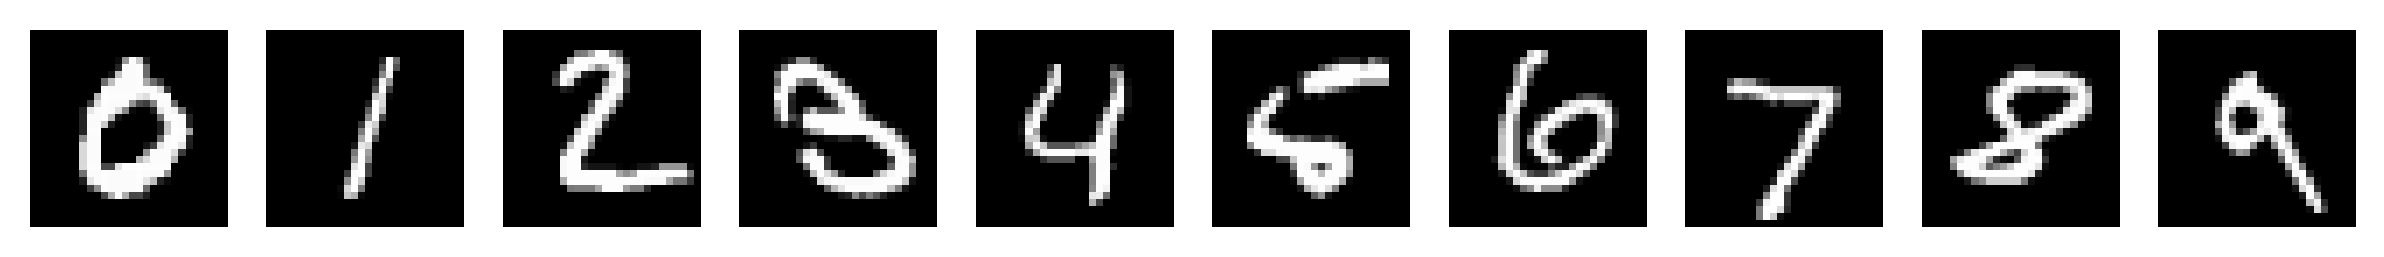

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10,1), dpi=300)

for col, img in zip(axes, test_img):
  col.imshow(img, cmap='gray')
  col.axis('off')

## Autoencoder architecture

In [ ]:
# repeatedly reduce the size
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # -> N, 3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded